In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sts_train=pd.read_csv('/content/drive/MyDrive/AI/STS-Test-train.csv',encoding="ISO-8859-1",header=None,names=['Polarity','ID','Date','Query','User','Tweet'])
sts_test=pd.read_csv('/content/drive/MyDrive/AI/STS-Test-test.csv',encoding="ISO-8859-1",header=None,names=['Polarity','ID','Date','Query','User','Tweet'])

sts_tweet = sts_test[['Polarity','Tweet']]

train = sts_train.sample(n=1250)
#df5_train = train[['Polarity','Tweet']]

sts_tweet.head()

,Polarity,Tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


### Method 1 - Replacing negations 

In [ ]:
replacement_patterns = [(r'won\'t', 'will not'),(r'can\'t', 'cannot'),(r'isn\'t', 'is not'),(r'ain\'t', 'is not'),(r'(\w+)\'ll', '\g<1> will'),(r'(\w+)n\'t', '\g<1> not'),
	(r'couldn\'t', 'could not'),(r'weren\'t', 'were not'),(r'aren\'t', 'are not'),(r'was\'t', 'was not'),(r'(\w+)\'ve', '\g<1> have'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)\'d', '\g<1> would'),
  (r'don\'t', 'do not'),(r'didn\'t', 'did not'),(r'shouldn\'t', 'should not'),(r'doesn\'t', 'does not'),(r'haven\'t', 'have not'),
  (r'hasn\'t', 'has not'),(r'hadn\'t', 'had not'),]

class RegexpReplacer(object):

  def __init__(self, patterns=replacement_patterns):
    self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
	
  def replace(self, text):
    s = text
    for (pattern, repl) in self.patterns:
      s = re.sub(pattern, repl, s)
    return s


In [ ]:
replacer = RegexpReplacer()
repl = lambda x: replacer.replace(x)
sts_tweet['text'] = sts_tweet.Tweet.map(repl)
sts_tweet.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Polarity,Tweet,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck...","Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...,@kenburbary You will love your Kindle2. I have...
4,4,@mikefish Fair enough. But i have the Kindle2...,@mikefish Fair enough. But i have the Kindle2...
5,4,@richardebaker no. it is too big. I'm quite ha...,@richardebaker no. it is too big. I'm quite ha...
6,0,Fuck this economy. I hate aig and their non lo...,Fuck this economy. I hate aig and their non lo...
7,4,Jquery is my new best friend.,Jquery is my new best friend.
8,4,Loves twitter,Loves twitter
9,4,how can you not love Obama? he makes jokes abo...,how can you not love Obama? he makes jokes abo...


In [ ]:
punc = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)
sts_tweet['text'] = sts_tweet.text.map(punc)
sts_tweet['text'] = sts_tweet.text.str.lower()
sts_tweet.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Polarity,Tweet,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i loooooooovvvvvveee my kindle2 not that th...
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle2 love it lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle2 it fuck...
3,4,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle2 i have had mine ...
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle2 and i t...
5,4,@richardebaker no. it is too big. I'm quite ha...,no it is too big i m quite happy with the ...
6,0,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non lo...
7,4,Jquery is my new best friend.,jquery is my new best friend
8,4,Loves twitter,loves twitter
9,4,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abo...


### Method 2 - URL Preprocessing

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

p.set_options(p.OPT.URL)
nourl_list = []

for atweet in list(sts_tweet['text']):
  t = p.clean(atweet)
  nourl_list.append(t)
sts_tweet['text'] = nourl_list

sts_tweet.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Polarity,Tweet,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i loooooooovvvvvveee my kindle2 not that the d...
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle2 love it lee childs is good ...
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle2 it fucking r...
3,4,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle2 i have had mine for...
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle2 and i think...
5,4,@richardebaker no. it is too big. I'm quite ha...,no it is too big i m quite happy with the kindle2
6,0,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...
7,4,Jquery is my new best friend.,jquery is my new best friend
8,4,Loves twitter,loves twitter
9,4,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...


### Method 3 - Reverting words that contain repeated letters to their original English form 

In [ ]:
class RepeatReplacer(object):
	def __init__(self):
		self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
		self.repl = r'\1\2\3'

	def replace(self, word):
		if wordnet.synsets(word):
			return word
		
		repl_word = self.repeat_regexp.sub(self.repl, word)
		
		if repl_word != word:
			return self.replace(repl_word)
		else:
			return repl_word

In [ ]:
repeat = RepeatReplacer()
r = lambda x: repeat.replace(x)
sts_tweet['text'] = sts_tweet.text.map(r)
sts_tweet.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Polarity,Tweet,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle2 not that the dx is col but t...
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle2 love it le childs is god read
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle2 it fucking rocks
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle2 i have had mine for ...
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle2 and i think...
5,4,@richardebaker no. it is too big. I'm quite ha...,no it is to big i m quite hapy with the kindle2
6,0,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...
7,4,Jquery is my new best friend.,jquery is my new best friend
8,4,Loves twitter,loves twiter
9,4,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...


### Method 4 - Removing numbers

In [ ]:
remove_number = lambda x:''.join([i for i in x if not i.isdigit()])
sts_tweet['text'] = sts_tweet.text.map(remove_number)
sts_tweet.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Polarity,Tweet,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle not that the dx is col but th...
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it le childs is god read
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle it fucking rocks
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle i have had mine for a...
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...
5,4,@richardebaker no. it is too big. I'm quite ha...,no it is to big i m quite hapy with the kindle
6,0,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...
7,4,Jquery is my new best friend.,jquery is my new best friend
8,4,Loves twitter,loves twiter
9,4,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...


### Method 6 - Expanding Acronyms 

In [ ]:
import csv
filename = "/content/drive/MyDrive/AI/Slang.txt"
access = "r"

def convert_acronym(text):
  string = text.split(" ")
  j = 0
  for s in string:
    with open(filename,access) as f:
      data = csv.reader(f,delimiter = "=")
      s = re.sub('[^a-zA-Z0-9-_.]'," ",s)
      for row in data:
        if s.upper() == row[0]:
          string[j] = row[1]
      f.close()
    j = j+1
  return ' '.join(string)

In [ ]:
acr = lambda x:convert_acronym(x)
sts_tweet['text'] = sts_tweet.text.map(acr)
sts_tweet.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Polarity,Tweet,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle not that the dx is col but th...
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it le childs is god read
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle it fucking rocks
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle i have had mine for a...
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...
5,4,@richardebaker no. it is too big. I'm quite ha...,no it is to big i m quite hapy with the kindle
6,0,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...
7,4,Jquery is my new best friend.,jquery is my new best friend
8,4,Loves twitter,loves twiter
9,4,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...


#### Tokenization and Lemmatization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

sts_tweet['processed_tweets'] = sts_tweet['text'].apply(lambda x:word_tokenize(x))
#df5_train['processed_tweets'] = df5_train['tweet_without_stopwords'].apply(lambda x:word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
nltk.download('wordnet')

def lemmatizing(words):
    lemmatizer=WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]
sts_tweet['processed_tweets'] = sts_tweet['processed_tweets'].apply(lambda x: lemmatizing(x))
#df5_train['processed_tweets'] = df5_train['processed_tweets'].apply(lambda x: lemmatizing(x))

def final_text(words):
     return ' '.join(words)
sts_tweet['processed_tweets'] = sts_tweet['processed_tweets'].apply(lambda x:final_text(x))
#df5_train['processed_tweets'] = df5_train['processed_tweets'].apply(lambda x:final_text(x))

sts_tweet.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Polarity,Tweet,text,processed_tweets
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle not that the dx is col but th...,i love my kindle not that the dx is col but th...
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it le childs is god read,reading my kindle love it le child is god read
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle it fucking rocks,ok first asesment of the kindle it fucking rock
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle i have had mine for a...,you wil love your kindle i have had mine for a...
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...,fair enough but i have the kindle and i think ...


#### Prior Polarity

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vadar = SentimentIntensityAnalyzer()
sts_tweet[['Negative','Neutral','Positive','Compound']] = sts_tweet['processed_tweets'].apply(vadar.polarity_scores).apply(pd.Series)
sts_tweet.head()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Polarity,Tweet,text,processed_tweets,Negative,Neutral,Positive,Compound
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle not that the dx is col but th...,i love my kindle not that the dx is col but th...,0.000,0.593,0.407,0.8628
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it le childs is god read,reading my kindle love it le child is god read,0.000,0.559,0.441,0.7430
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle it fucking rocks,ok first asesment of the kindle it fucking rock,0.000,0.784,0.216,0.2960
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle i have had mine for a...,you wil love your kindle i have had mine for a...,0.135,0.660,0.204,0.4939
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...,fair enough but i have the kindle and i think ...,0.000,0.573,0.427,0.7717


#### Predicting values

In [ ]:
sts_tweet['vader_polarity'] = pd.cut(sts_tweet['Compound'],bins=3,labels=[0,2,4])
sts_tweet.head(10)

,Polarity,Tweet,text,processed_tweets,Negative,Neutral,Positive,Compound,vader_polarity
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle not that the dx is col but th...,i love my kindle not that the dx is col but th...,0.000,0.593,0.407,0.8628,4
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it le childs is god read,reading my kindle love it le child is god read,0.000,0.559,0.441,0.7430,4
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle it fucking rocks,ok first asesment of the kindle it fucking rock,0.000,0.784,0.216,0.2960,2
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle i have had mine for a...,you wil love your kindle i have had mine for a...,0.135,0.660,0.204,0.4939,4
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...,fair enough but i have the kindle and i think ...,0.000,0.573,0.427,0.7717,4
5,4,@richardebaker no. it is too big. I'm quite ha...,no it is to big i m quite hapy with the kindle,no it is to big i m quite hapy with the kindle,0.196,0.804,0.000,-0.2960,2
6,0,Fuck this economy. I hate aig and their non lo...,fuck this economy i hate aig and their non loa...,fuck this economy i hate aig and their non loa...,0.444,0.556,0.000,-0.8020,0
7,4,Jquery is my new best friend.,jquery is my new best friend,jquery is my new best friend,0.000,0.351,0.649,0.8126,4
8,4,Loves twitter,loves twiter,love twiter,0.000,0.192,0.808,0.6369,4
9,4,how can you not love Obama? he makes jokes abo...,how can you not love obama he makes jokes abou...,how can you not love obama he make joke about ...,0.231,0.618,0.151,-0.2887,2


              precision    recall  f1-score   support

    Negative       0.92      0.49      0.64       177
     Neutral       0.45      0.79      0.58       139
    Positive       0.70      0.62      0.65       182

    accuracy                           0.62       498
   macro avg       0.69      0.63      0.62       498
weighted avg       0.71      0.62      0.63       498



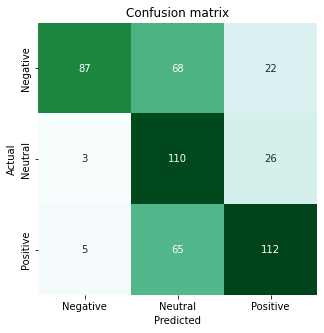

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(sts_tweet['Polarity'],sts_tweet['vader_polarity'],target_names=['Negative','Neutral','Positive']))

def plot_cm(y_test, y_pred, target_names=['Negative','Neutral','Positive'],figsize=(5,5)):
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False,ax=ax)
  ax.set_title('Confusion matrix')
  ax.set_xlabel('Predicted')
  ax.set_xticklabels(target_names)
  ax.set_ylabel('Actual')
  ax.set_yticklabels(target_names,fontdict={'verticalalignment': 'center'});

plot_cm(sts_tweet['Polarity'],sts_tweet['vader_polarity'])

### 3 way N-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer(ngram_range=(1,2))

corpus = sts_tweet['processed_tweets'].to_list()
X = cv.fit_transform(corpus)
final_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
print(final_df.shape)

final_df.head()

(498, 6437)


,abortion,abortion zealot,about,about ajax,about anything,about at,about gm,about himself,about lack,about lambda,about minute,about my,about seing,about tethering,about the,about this,about to,about torture,about your,above,above safeway,absolutely,absolutely blow,absolutely hilarious,ace,ace damn,ace throtles,acg,acg custom,aching,acia,acia pils,acident,acident gues,acident location,acording,acording to,acosts,acosts roger,acount,...,you tried,you twipin,you use,you verse,you want,you were,you wil,you won,you work,your,your advice,your car,your gm,your kindle,your list,your money,your normal,your number,your prayer,your stanford,your top,your typical,your very,youtube,youtube adobe,yr,yr old,yuan,yuan invested,yumy,zealot,zealot who,zero,zero desire,zom,zom lebron,zomg,zomg have,zydrunas,zydrunas are
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = sts_tweet['Polarity']

X_train, X_test, y_train, y_test=train_test_split(final_df, y, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(373, 6437) (373,) (125, 6437) (125,)


In [ ]:
####################################################  Naive Bayes #################################################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        43
           2       0.73      0.51      0.60        37
           4       0.65      0.87      0.74        45

    accuracy                           0.72       125
   macro avg       0.73      0.71      0.71       125
weighted avg       0.73      0.72      0.71       125

Confusion matrix: 
[[32  2  9]
 [ 6 19 12]
 [ 1  5 39]]


In [ ]:
#################################################### SVM ######################################################
from sklearn import svm

svm_classifier=svm.SVC(C=100, kernel='linear', gamma=0.5)
svm_classifier.fit(X_train, y_train)

y_pred=svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        43
           2       0.58      0.51      0.54        37
           4       0.61      0.76      0.67        45

    accuracy                           0.66       125
   macro avg       0.66      0.65      0.65       125
weighted avg       0.67      0.66      0.66       125

Confusion matrix: 
[[29  6  8]
 [ 4 19 14]
 [ 3  8 34]]


In [ ]:
############################################### Random Forest ###########################################################
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(max_depth=30,n_estimators=4000)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        43
           2       0.67      0.38      0.48        37
           4       0.56      0.89      0.69        45

    accuracy                           0.64       125
   macro avg       0.67      0.62      0.62       125
weighted avg       0.67      0.64      0.63       125

Confusion matrix: 
[[26  4 13]
 [ 5 14 18]
 [ 2  3 40]]


### Binary N-gram

In [ ]:
binary_n = sts_tweet
indexNames = sts_tweet[sts_tweet['Polarity']==2].index
binary_n.drop(indexNames , inplace=True)
binary_n.head()

,Polarity,Tweet,text,processed_tweets,Negative,Neutral,Positive,Compound,vader_polarity
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i love my kindle not that the dx is col but th...,i love my kindle not that the dx is col but th...,0.000,0.593,0.407,0.8628,4
1,4,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it le childs is god read,reading my kindle love it le child is god read,0.000,0.559,0.441,0.7430,4
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",ok first asesment of the kindle it fucking rocks,ok first asesment of the kindle it fucking rock,0.000,0.784,0.216,0.2960,2
3,4,@kenburbary You'll love your Kindle2. I've had...,you wil love your kindle i have had mine for a...,you wil love your kindle i have had mine for a...,0.135,0.660,0.204,0.4939,4
4,4,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...,fair enough but i have the kindle and i think ...,0.000,0.573,0.427,0.7717,4


In [ ]:
corpus = binary_n['processed_tweets'].to_list()
X = cv.fit_transform(corpus)
final_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
print(final_df.shape)

final_df.head()

(359, 5117)


,abortion,abortion zealot,about,about anything,about at,about gm,about himself,about lack,about lambda,about minute,about my,about seing,about the,about this,about torture,about your,absolutely,absolutely blow,absolutely hilarious,ace,ace damn,ace throtles,aching,acia,acia pils,acident,acident gues,acording,acording to,actualy,actualy quite,ad,ad from,adam,adam lambert,adiction,adiction thank,adictive,adidas,adidas laughing,...,you rich,you rock,you said,you sent,you stil,you texnrds,you think,you time,you to,you tried,you twipin,you verse,you want,you were,you wil,you won,you work,your,your advice,your car,your kindle,your money,your number,your prayer,your stanford,your top,your very,youtube,youtube adobe,yr,yr old,yumy,zealot,zealot who,zero,zero desire,zomg,zomg have,zydrunas,zydrunas are
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = binary_n['Polarity']

X_train, X_test, y_train, y_test=train_test_split(final_df, y, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(269, 5117) (269,) (90, 5117) (90,)


In [ ]:
############################################# Logistic Regression Classifier ###########################################################

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

lr_classifier=LogisticRegression()
lr_classifier.fit(X_train, y_train)

y_pred=lr_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        44
           4       0.79      0.80      0.80        46

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

Confusion matrix: 
[[34 10]
 [ 9 37]]


In [ ]:
####################################################  Naive Bayes #################################################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           4       0.83      0.85      0.84        46

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

Confusion matrix: 
[[36  8]
 [ 7 39]]


In [ ]:
#################################################### SVM ######################################################
from sklearn import svm

svm_classifier=svm.SVC(C=100, kernel='linear', gamma=0.5)
svm_classifier.fit(X_train, y_train)

y_pred=svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           4       0.81      0.85      0.83        46

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90

Confusion matrix: 
[[35  9]
 [ 7 39]]


In [ ]:
############################################### Random Forest ###########################################################
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(max_depth=30,n_estimators=4000)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        44
           4       0.74      0.91      0.82        46

    accuracy                           0.79        90
   macro avg       0.81      0.79      0.78        90
weighted avg       0.81      0.79      0.79        90

Confusion matrix: 
[[29 15]
 [ 4 42]]
